<a href="https://colab.research.google.com/github/Almasyriqi/PCVK_Genap_2022/blob/main/UAS_PCVK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**UAS Project PCVK Kelompok TI-3G**

1. Dito Cahya Pratama (1941720030)

2. M. Farhan Fitrahtur R (1941720133)

3. M. Syifa'ul Ikrom Almasyriqi (1941720057)

In [ ]:
from google.colab import drive

# Accessing My Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import library yang dibutuhkan
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from google.colab.patches import cv2_imshow
import glob
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Fungsi untuk load image dari drive lalu resize image menjadi setengah dari image asli, 
# kemudian kumpulan image dimasukkan ke dalam array
def load_image(array_image, path, color):
  for img in glob.glob(path):
    n = cv.imread(img, color)
    scale_percent = 50 # percent of original size
    width = int(n.shape[1] * scale_percent / 100)
    height = int(n.shape[0] * scale_percent / 100)
    dim = (width, height)
    n = cv.resize(n, dim)
    array_image.append(n)
  return array_image

In [ ]:
train_daun1 = []
train_daun2 = []
train_daun3 = []
train_image = [train_daun1, train_daun2, train_daun3]

path_daun1 = '/content/drive/MyDrive/PCVK_MM/Images/Leaf_01/Acer_Capillipes/*.jpg'
path_daun2 = '/content/drive/MyDrive/PCVK_MM/Images/Leaf_01/Acer_Circinatum/*.jpg'
path_daun3 = '/content/drive/MyDrive/PCVK_MM/Images/Leaf_01/Castanea_Sativa/*.jpg'
path_image = [path_daun1, path_daun2, path_daun3]

for i in range(3):
  load_image(train_image[i], path_image[i], 0)

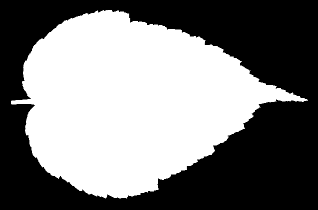

In [ ]:
cv2_imshow(train_image[0][1])

In [ ]:
# Ekstraksi data dengan deteksi tepi gambar daun menggunakan canny
edged_daun = train_image.copy()
for i in range(len(edged_daun)):
  for j in range(len(edged_daun[0])):
    edged_daun[i][j] = cv.Canny(edged_daun[i][j], 30, 200)

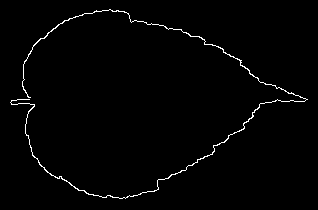

In [ ]:
cv2_imshow(edged_daun[0][1])

In [ ]:
# Menghitung area daun pada setiap dataset
area_daun1 = [0] * len(edged_daun[0])
area_daun2 = [0] * len(edged_daun[0])
area_daun3 = [0] * len(edged_daun[0])

for i in range(len(edged_daun)):
  for j in range(len(edged_daun[0])):
    for y in range(edged_daun[i][j].shape[0]):
      for x in range(edged_daun[i][j].shape[1]):
        if(edged_daun[i][j][y][x] > 0):
          if(i == 0):
            area_daun1[j] += 1
          elif(i == 1):
            area_daun2[j] += 1
          else:
            area_daun3[j] += 1

In [ ]:
# Membuat data train dari data area bentuk daun
label1 = [0] * len(area_daun1)
label2 = [1] * len(area_daun2)
label3 = [2] * len(area_daun3)

data1 = np.stack((area_daun1, label1), axis=1)
data2 = np.stack((area_daun2, label2), axis=1)
data3 = np.stack((area_daun3, label3), axis=1)

df = pd.DataFrame(data1, columns=["Area", "Label"])
df1 = pd.DataFrame(data2, columns=["Area", "Label"])
df2 = pd.DataFrame(data3, columns=["Area", "Label"])

df = df.append(df1)
df = df.append(df2)

print("Data Train : ")
df
# shuffled = df.sample(frac=1).reset_index()
# shuffled

Data Train : 


,Area,Label
0,910,0
1,939,0
2,922,0
3,920,0
4,931,0
5,944,0
6,907,0
7,927,0
8,914,0
9,956,0


In [ ]:
# Create and train the model RandomForest
X_train = df.iloc[:,0].values
X_train = X_train.reshape(-1,1)
Y_train = df.iloc[:,1].values

RandomForestClassifier = RandomForestClassifier()
RandomForestClassifier.fit(X_train, Y_train)

def prediksi_daun(area):
  prediction = RandomForestClassifier.predict(area)
  if(prediction == 0):
    prediksi = "Acer_Capillipes"
  elif(prediction == 1):
    prediksi = "Acer_Circinatum"
  else:
    prediksi = "Castanea_Sativa"
  return prediksi

In [ ]:
# Create and train the model KNN
x_train = df.iloc[:,0].values
x_train = x_train.reshape(-1,1)
y_train = df.iloc[:,1].values

model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train, y_train)

def prediksi_daun_knn(area):
  prediction = model.predict(area)
  if(prediction == 0):
    prediksi = "Acer_Capillipes"
  elif(prediction == 1):
    prediksi = "Acer_Circinatum"
  else:
    prediksi = "Castanea_Sativa"
  return prediksi

Acer_Circinatum
[[1527]]


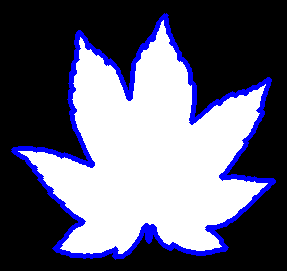

In [ ]:
# Klasifikasi menggunakan RandomForest atau KNN

#image = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/Leaf_01/Acer_Capillipes/acer_capillipes_06.ab.jpg')
image = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/Leaf_01/Acer_Circinatum/Acer_Circinatum_03.ab.jpg')
#image = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/Leaf_01/Castanea_Sativa/Castanea_Sativa_01.ab.jpg')

# resize gambar input
scale_percent = 50 # percent of original size
width = int(image.shape[1] * scale_percent / 100)
height = int(image.shape[0] * scale_percent / 100)
dim = (width, height)
image = cv.resize(image, dim)
image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Menerapkan Canny Edge Detection
edged = cv.Canny(image_gray, 30, 200)

# Menerapkan fungsi findContours() openCV
contours, hierarchy = cv.findContours(edged, 
    cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
cv.drawContours(image, contours, -1, (255, 0, 0), 3)

# Menghitung area input gambar
area = np.array([[0]])
for i in range(edged.shape[0]):
  for j in range(edged.shape[1]):
    if(edged[i,j] > 0):
      area[0][0] += 1

# Prediksi Bentuk Daun
print(prediksi_daun(area))
# print(prediksi_daun_knn(area))
print(area)

cv2_imshow(image)

In [ ]:
# Load semua image pada folder Leaf Images 01
daun1 = []
daun2 = []
daun3 = []
daun1_gray = []
daun2_gray = []
daun3_gray = []

images = [daun1, daun2, daun3]
images_gray = [daun1_gray, daun2_gray, daun3_gray]

for i in range(3):
  load_image(images[i], path_image[i], 1)
  load_image(images_gray[i], path_image[i], 0)

# Menerapkan Canny Edge Detection
edged_image = images_gray.copy()
for i in range(len(edged_image)):
  for j in range(len(edged_image[0])):
    edged_image[i][j] = cv.Canny(edged_image[i][j], 30, 200)

# # Menerapkan fungsi findContours() openCV
contours = [ [ None for y in range( len(edged_image[0]) ) ] for x in range( len(edged_image) ) ]
hierarchy = [ [ None for y in range( len(edged_image[0]) ) ] for x in range( len(edged_image) ) ]
for i in range(len(edged_image)):
  for j in range(len(edged_image[0])):
    images[i][j] = cv.cvtColor(images[i][j], cv.COLOR_BGR2RGB)
    contours[i][j], hierarchy[i][j] = cv.findContours(edged_image[i][j], 
        cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
    cv.drawContours(images[i][j], contours[i][j], -1, (255, 0, 0), 3)

# # Menghitung area input gambar
area = [ [ 0 for y in range( len(edged_image[0]) ) ] for x in range( len(edged_image) ) ]

for i in range(len(edged_image)):
  for j in range(len(edged_image[0])):
    for y in range(edged_image[i][j].shape[0]):
      for x in range(edged_image[i][j].shape[1]):
        if(edged_image[i][j][y][x] > 0):
          area[i][j] += 1

In [ ]:
# Membuat data test dengan label dari data area bentuk daun
label1 = [0] * len(area[0])
label2 = [1] * len(area[0])
label3 = [2] * len(area[0])

label = np.concatenate((label1, label2))
label = np.concatenate((label, label3))

data = []
for i in range(len(area)):
  for j in range(len(area[0])):
    data.append(area[i][j])

data = np.stack((data, label), axis=1)
df_test = pd.DataFrame(data, columns=["Area", "Label"])
df_test

,Area,Label
0,910,0
1,939,0
2,922,0
3,920,0
4,931,0
5,944,0
6,907,0
7,927,0
8,914,0
9,956,0


In [ ]:
# Menentukan X dan Y test
X_test = df_test.iloc[:,0].values
X_test = X_test.reshape(-1,1)
Y_test = df_test.iloc[:,1].values

Model Test Accuracy Score : 
95.83333333333334%


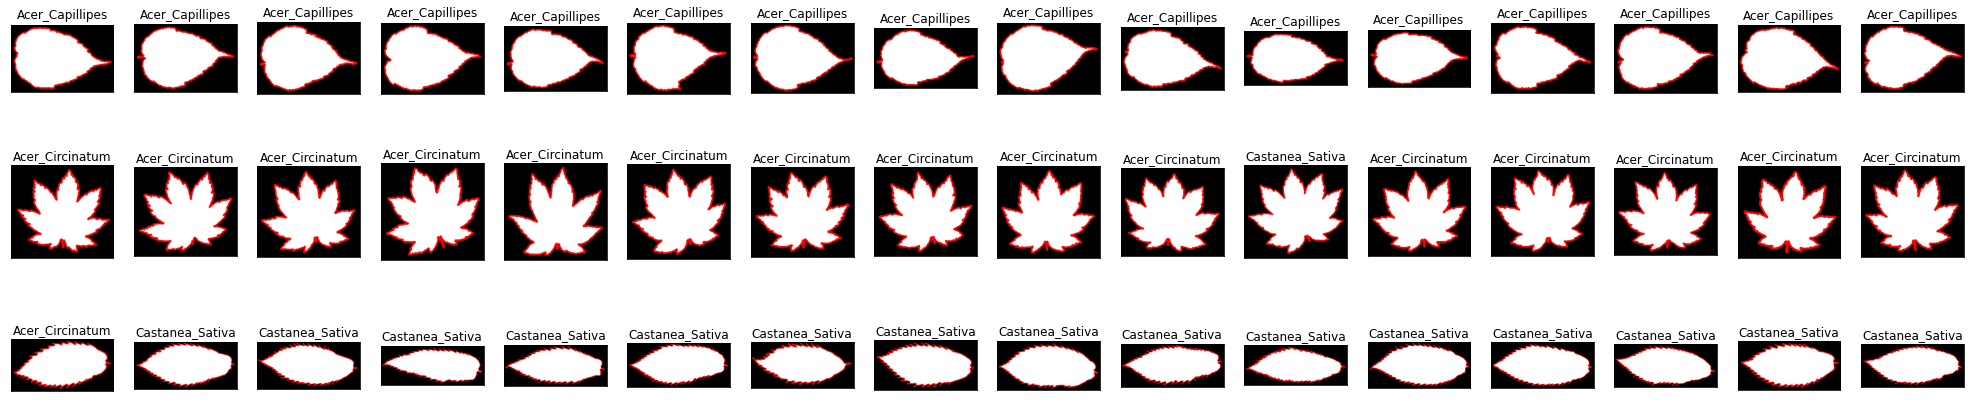

In [ ]:
# Prediksi data test menggunakan KNN
prediksi = [ [ "" for y in range( len(edged_image[0]) ) ] for x in range( len(edged_image) ) ]

for i in range(len(prediksi)):
  for j in range(len(prediksi[0])):
    prediksi[i][j] = prediksi_daun_knn([[area[i][j]]])

print('Model Test Accuracy Score : ')
print(str(accuracy_score(Y_test, model.predict(X_test)) * 100)+ '%')

# Membuat figure
fig = plt.figure(figsize=(35, 8))

# setting jumlah baris dan kolom
rows = 3
columns = 16

# add subplot
index = 1
for i in range(rows):
  for j in range(columns):
    fig.add_subplot(rows, columns, index)
    plt.title(prediksi[i][j])
    plt.imshow(images[i][j])
    plt.xticks([]),plt.yticks([])
    index += 1
plt.show()

Model Test Accuracy Score : 
100.0%


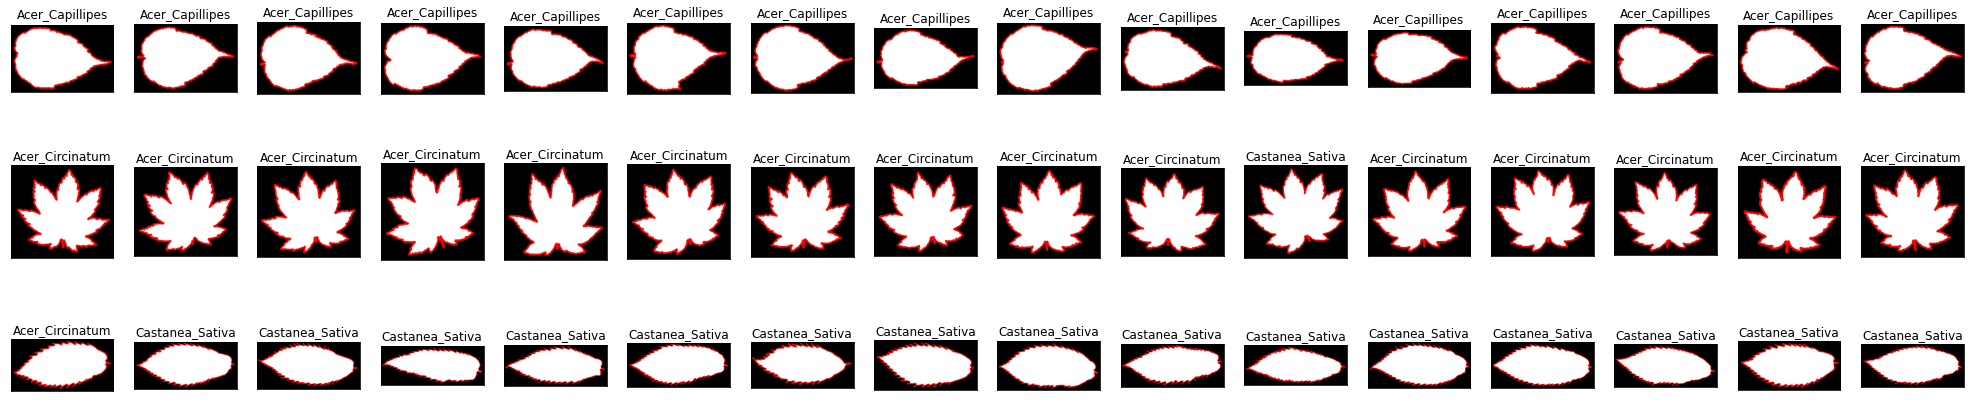

In [ ]:
# Prediksi data test menggunakan RandomForest
prediksi_rf = [ [ "" for y in range( len(edged_image[0]) ) ] for x in range( len(edged_image) ) ]

for i in range(len(prediksi_rf)):
  for j in range(len(prediksi_rf[0])):
    prediksi_rf[i][j] = prediksi_daun([[area[i][j]]])

print('Model Test Accuracy Score : ')
print(str(accuracy_score(Y_test, RandomForestClassifier.predict(X_test)) * 100)+ '%')

# Membuat figure
fig = plt.figure(figsize=(35, 8))

# setting jumlah baris dan kolom
rows = 3
columns = 16

# add subplot
index = 1
for i in range(rows):
  for j in range(columns):
    fig.add_subplot(rows, columns, index)
    plt.title(prediksi[i][j])
    plt.imshow(images[i][j])
    plt.xticks([]),plt.yticks([])
    index += 1
plt.show()